# Correlation

Correlation tests are used to check if two samples are related. They are often used for feature selection and multivariate analysis in data preprocessing and exploration.

## Pearson's Correlation Coefficient

The goal of this test is to answer the question: do two samples have a linear relationship?

To answer this question, we will take the following steps:

1. Calculate the Pearson correlation coefficient, $r_{xy}$
2. Calculate the corresponding t-values
3. Test whether the t-values are significant or not

In this lesson, we will be looking at a dataset of student scores on an exam.

In [46]:
# imports
# data load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from pydataset import data

In [47]:
df = pd.read_csv("exam_scores.csv")

In [48]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   exam_score       40 non-null     float64
 1   hours_studied    40 non-null     float64
 2   study_strategy   20 non-null     object 
 3   handedness       40 non-null     object 
 4   coffee_consumed  40 non-null     int64  
 5   hours_slept      40 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


### Pre-Set Values

Before we perform the test, we will choose some values for our confidence interval and, based on that value, our alpha.

In [51]:
# Number of samples
n = df.shape[0]
# Degrees of freedom
deg_f = (n - 2)
# Confidence interval

conf_in = 0.95
alpha = 1 - conf_in


When performing a correlation test, our null hypothesis is that there is no linear correlation between the two variables.

$H_0$: There is no linear correlation between the number of hours studied and the score on the exam.

### Calculate Pearson Correlation Coefficient

The correlation coefficient, $r_{xy}$ is a unitless continuous numerical measure between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation. 

We will calculate the correlation between hours studied and exam score.

$$
r_{xy} = \frac{\frac{1}{n} \sum(x_i - \bar{x})(y_i - \bar{y})}{s_x s_y}
$$

In [52]:
# let's make a quick little function for standard deviation, and calculate the correlation coefficient:

In [53]:
x = df.hours_studied
y = df.exam_score

def stdev(x):
    '''
    returns the float value of standard deviation of input x,
    an argument representing a pandas Series or 1-D numpy array
    '''
    variance = ((x - x.mean()) ** 2).sum() / n
    return variance ** 0.5

In [54]:
stdev(y)

28.687692543959553

In [55]:
r_xy = ((1 / n) * (((x - x.mean()) * (y - y.mean())) / (stdev(x) * stdev(y))))

In [56]:
r_xy

0     0.053658
1     0.054893
2     0.000577
3     0.002957
4    -0.001705
5     0.006657
6     0.059323
7    -0.002521
8     0.016446
9     0.092197
10    0.002684
11    0.041774
12    0.002472
13   -0.002741
14    0.015264
15    0.002940
16    0.027274
17    0.011829
18    0.012015
19    0.016449
20    0.005465
21    0.013852
22   -0.001413
23    0.010000
24   -0.000899
25    0.004012
26    0.000294
27    0.028992
28    0.036818
29    0.016910
30    0.000434
31    0.055352
32    0.014369
33    0.127909
34    0.078971
35   -0.009606
36    0.006737
37    0.026158
38    0.009184
39   -0.000831
dtype: float64

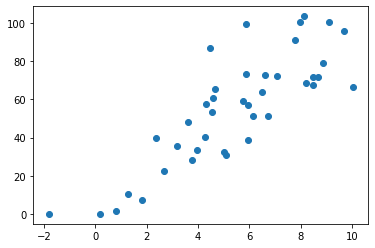

In [57]:
plt.scatter(x, y)

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

### And just as we noted, we can think of these two Series as an x and y variable on a cartesian plot, and visually estimate correlation:

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>

### Calculate the corresponding p-value

We can calculate a t-statistic for our correlation coefficient in order to inform us how likely it is that we observed this result due to chance. We will then use this t-statistic to find our p-value.

The t-value can be positive for positive correlations and negative for negative correlations, and is given by:

$$ t = \frac{r_{xy}\sqrt{n-2}}{\sqrt{1-r^{2}_{xy}}} $$

Where $n - 2$ is our degrees of freedom.

In [58]:
# calculate our t-statistic:

t = (r_xy * sqrt(deg_f)) / sqrt(1 - (r_xy ** 2))

TypeError: cannot convert the series to <class 'float'>

In [13]:
t

NameError: name 't' is not defined

Once we have our t-statistic, we can find our p-value by looking up the t-statistic in a t-table, or by using scipy's `t` distribution:

In [14]:
# calculate our p-value: 
p = stats.t.sf(t, df = deg_f) * 2

NameError: name 't' is not defined

In [15]:
p

NameError: name 'p' is not defined

Lastly, we compare our p value to our alpha that we selected earlier:

In [16]:
# compare our p-value to our alpha:

p < alpha

NameError: name 'p' is not defined

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>

In [ ]:
# Now, the easy way:

In [59]:
corr, p = stats.pearsonr(x, y)

In [60]:
corr

0.8351498542755271

In [61]:
p

2.0762953240187937e-11

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

#### Mini exercise:

1. Load up the Swiss dataset from pydataset.
2. Examine the proportion of Catholic individuals to Fertility.
3. What do your r and p statistics indicate? What do they tell you? WHat is your null hypothesis?

In [67]:
swiss = data("swiss")
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [68]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [63]:
x = swiss["Catholic"]
y = swiss["Fertility"]

In [64]:
corr, p = stats.pearsonr(x, y)

In [65]:
corr

0.46368470065179385

In [66]:
p

0.0010285231901181417

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

## Correlation Gotchas

When working with correlation, keep in mind:

1. Correlation is not causality.
1. Correlation measures *linear* relationship between the 2 variables. However, there may be other types of relationships, such as a quadratic or absolute value relationship.
1. Correlations can be misleading when confounding variables are ignored.
1. Correlation tells you nothing about how large the relationship is.

### Correlation is Not Causation

Correlation means that two variables are associated, but doesn't tell us whether one causes the other or not.

### Non-Linear Relationship

Here we'll look at an example of a non-linear relationship:

In [ ]:
# let's plot something that definitely does have a correlation, but is not linear

In [81]:
x = np.linspace(0, 3)
y = x ** 2

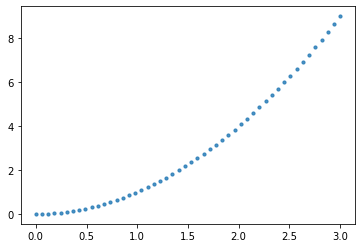

In [82]:
plt.scatter(x, y, s = 10, alpha = 0.8)
plt.show()

In [83]:
r, p = stats.pearsonr(x, y)

In [84]:
p

3.5714386385973106e-30

In [85]:
r

0.9670508513356975

### Confounding Variables

We must be careful because correlation doesn't tell the whole story of a dataset. That is, correlation just looks at two variables in isolation, and doesn't account for any others. For example, a certain subgroup could have a strong correlation while another does not, or a third variable could be influencing both of the variables.

In our exam score data, if we look at coffee consumption and exam score, we see that they are strongly negatively correlated:

In [106]:
df = pd.read_csv("exam_scores.csv")

In [107]:
df.columns

Index(['exam_score', 'hours_studied', 'study_strategy', 'handedness',
       'coffee_consumed', 'hours_slept'],
      dtype='object')

In [108]:
x = df.coffee_consumed
y = df.exam_score

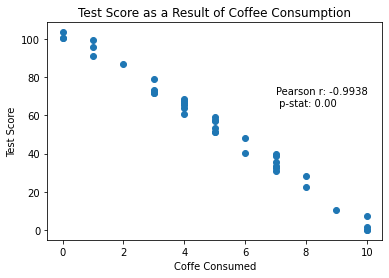

In [109]:
plt.scatter(x, y)
plt.xlabel("Coffe Consumed")
plt.ylabel("Test Score")
plt.title("Test Score as a Result of Coffee Consumption")
plt.annotate(f'Pearson r: {stats.pearsonr(x, y)[0]: .4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (7, 65))
plt.show()

In [110]:
x = df.hours_slept

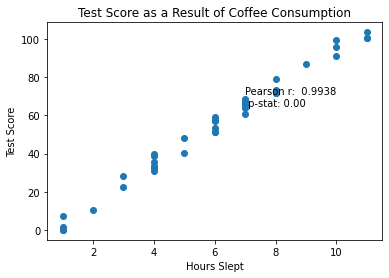

In [111]:
plt.scatter(x, y)
plt.xlabel("Hours Slept")
plt.ylabel("Test Score")
plt.title("Test Score as a Result of Coffee Consumption")
plt.annotate(f'Pearson r: {stats.pearsonr(x, y)[0]: .4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (7, 65))
plt.show()

In [112]:
x = df.hours_slept
y = df.coffee_consumed

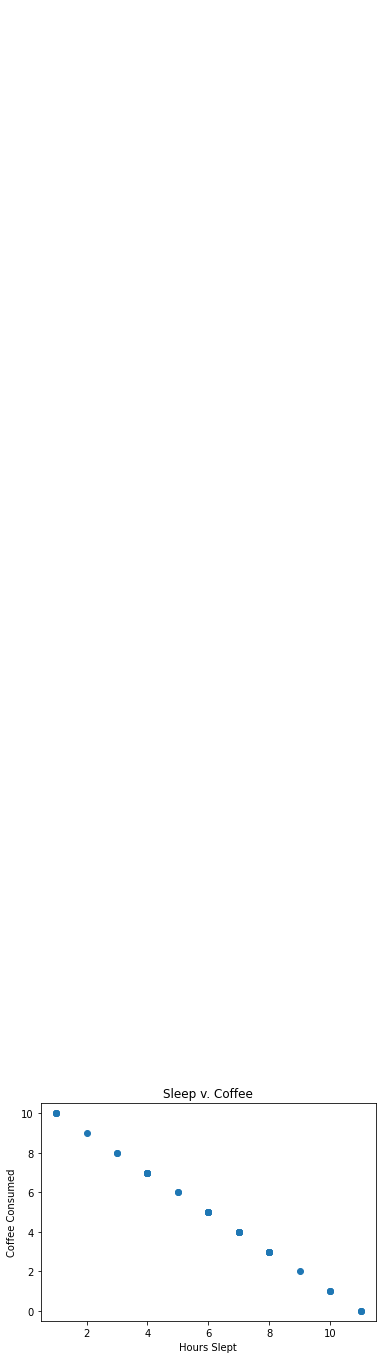

In [113]:
plt.scatter(x, y)
plt.xlabel("Hours Slept")
plt.ylabel("Coffee Consumed")
plt.title("Sleep v. Coffee")
plt.annotate(f'Pearson r: {stats.pearsonr(x, y)[0]: .4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (2, 65))
plt.show()

In [119]:
coffee_consumed = [0,1,2,3,4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

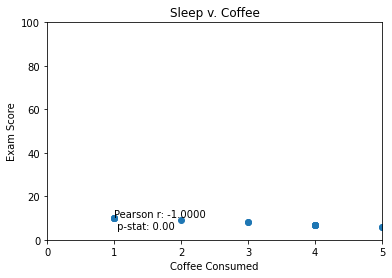

In [120]:
plt.scatter(x, y)
plt.xlabel("Coffee Consumed")
plt.ylabel("Exam Score")
plt.xlim(0, 5)
plt.ylim(0, 100)
plt.title("Sleep v. Coffee")
plt.annotate(f'Pearson r: {stats.pearsonr(x, y)[0]: .4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (1, 5))
plt.show()

However, it is probably the case that a third variable here has more influence, the number of hours that each student slept before the exam. We know that getting a good night's sleep improves exam scores, and if you don't get a good night's sleep, you are probably likely to drink more coffee.

### Scale of the Relationship

The correlation coefficient shows us how linearly correlated two variables are, but doesn't tell us the scale. That is one variable could increase/decrease in lock step with another, but the size of the change could be tiny.

Imagine our data was a little different and we tracked several student's coffee intake before an exam. The coffee consumption could be perfectly correlated with exam score, but to such a small amount that it doesn't matter.

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>